# **Ejemplo 5:** Escalamiento de datos

In [20]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

# Creación del conjunto de datos (dos máquinas embotelladoras)
# ==============================================================================
muA, sigmaA = 1000, 1 # media y desviación estándar embotelladora A
muB, sigmaB = 1000, 4 # media y desviación estándar embotelladora B
datosA = np.random.normal(muA, sigmaA, 1000)
datosB = np.random.normal(muB, sigmaB, 1000)
datos=np.column_stack((datosA, datosB))

# Título: ¿qué es un DataFrame?
#Url: https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/#entonces-qu%C3%A9-es-un-dataframe
Data = pd.DataFrame(datos, columns=['Embotelladora_A', 'Embotelladora_B'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_RR = preprocessor_RR.fit_transform(Data)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)
Data_prep_SS_v2  = preprocessor_SS.transform(Data) # Podemos observar que los resultados son los mismos que el método fit_transform

# Título: Diferencia entre fit_transform() y transform() en Scikit-Learn
# Url: https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757

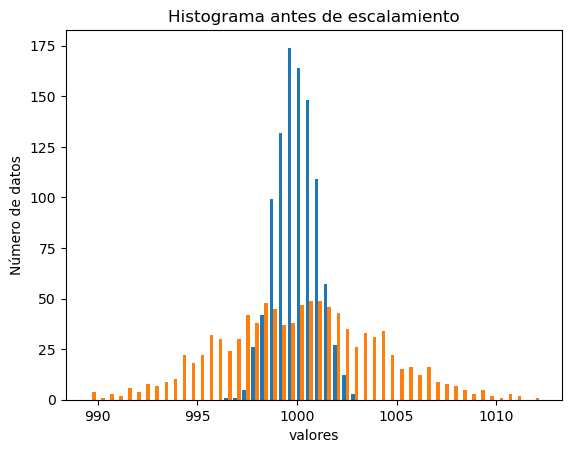

In [21]:
# Histograma antes de escalamiento
plt.hist(Data, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


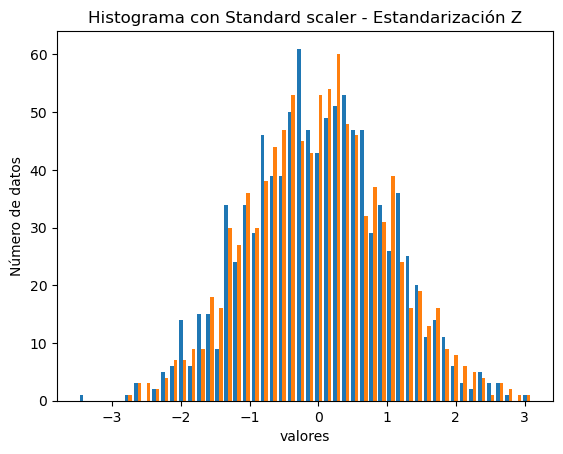

In [22]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [23]:
Data_prep_SS.std()


1.0

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



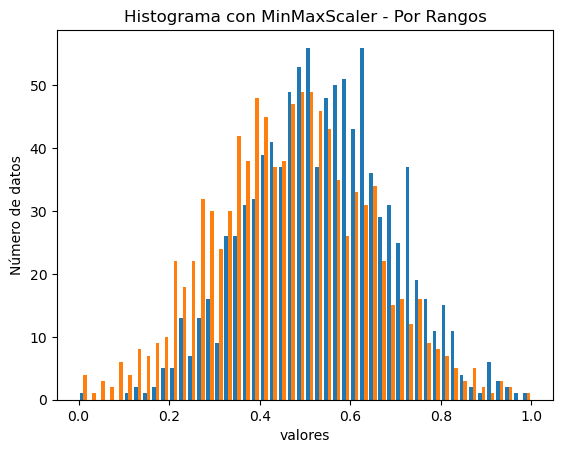

In [24]:
plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [25]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_prep_RR[:,0])-np.min(Data_prep_RR[:,0])

1.0

In [26]:
#Rango
#Data_prep_RR[:,1]
np.max(Data_prep_RR[:,1])-np.min(Data_prep_RR[:,1])

1.0

## Considerar que la variable X toma los valores 1,2,3,4,5,6,7,8,9,10. Se pide:

In [27]:
import numpy as np

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### a) (2 Puntos) ¿Cuánto vale la media, mediana, la desviación estándar muestral, la varianza muestral y el rango de la variable X?

In [28]:
# Calcular la media
media = np.mean(X)

# Calcular la mediana
mediana = np.median(X)

# Calcular la desviación estándar muestral
desviacion_estandar = np.std(X)

# Calcular la varianza muestral
varianza = np.var(X)

# Calcular el rango
rango = np.ptp(X)

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar muestral:", desviacion_estandar)
print("Varianza muestral:", varianza)
print("Rango:", rango)

Media: 5.5
Mediana: 5.5
Desviación estándar muestral: 2.8722813232690143
Varianza muestral: 8.25
Rango: 9


### b) (1 Punto) Utilizar la función describe() de Panda, para obtener la media, desviación estándar, etc...

In [29]:
import pandas as pd

# Definir la variable X
X = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Utilizar la función describe()
resumen_estadistico = X.describe()

# Imprimir el resumen estadístico
print(resumen_estadistico)

media = resumen_estadistico['mean']
mediana = resumen_estadistico['50%']
desviacion_estandar = resumen_estadistico['std']
varianza = resumen_estadistico['std']**2
rango = resumen_estadistico['max'] - resumen_estadistico['min']

# Imprimir los resultados
print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar muestral:", desviacion_estandar)
print("Varianza muestral:", varianza)
print("Rango:", rango)

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
dtype: float64
Media: 5.5
Mediana: 5.5
Desviación estándar muestral: 3.0276503540974917
Varianza muestral: 9.166666666666668
Rango: 9.0


### c) (1 Punto) ¿Por qué el resultado de calcular la desviación estándar con Numpy es diferente a la calculada por describe de Panda? ¿Qué ajuste sería necesario realizar para que los resultados fuesen similares/iguales? 

In [30]:
import pandas as pd

# Definir la variable X
X = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calcular la desviación estándar muestral con grados de libertad muestrales al igual que hace Pandas por defecto
desviacion_estandar = np.std(X, ddof=1)

print("Desviación estándar muestral:", desviacion_estandar)

Desviación estándar muestral: 3.0276503540974917


NumPy por defecto calcula la desviación estándar muestral, mientras que pandas por defecto calcula la desviación estándar poblacional. La diferencia está en el divisor utilizado en la fórmula. En NumPy, el divisor predeterminado es ddof=0 (grados de libertad poblacionales), mientras que en pandas es ddof=1 (grados de libertad muestrales).

### d) (1 Punto) Estandarizar la variable (escalamiento) mediante rangos y a continuación calcular la media y la mediana de la variable escalada.

In [31]:
import pandas as pd

# Definir la variable X
X = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Escalar la variable X al rango [0, 1]
X_escalada = (X - X.min()) / (X.max() - X.min())

# Calcular la media y la mediana de la variable escalada
media_escalada = np.mean(X_escalada)
mediana_escalada = np.median(X_escalada)

# Imprimir los resultados
print("Variable escalada:")
print(X_escalada)
print("\nMedia de la variable escalada:", media_escalada)
print("Mediana de la variable escalada:", mediana_escalada)

Variable escalada:
0    0.000000
1    0.111111
2    0.222222
3    0.333333
4    0.444444
5    0.555556
6    0.666667
7    0.777778
8    0.888889
9    1.000000
dtype: float64

Media de la variable escalada: 0.5
Mediana de la variable escalada: 0.5


### e) (1 Punto) Repetir el apartado anterior con el escalamiento Z - score

$ Z= \dfrac{X−mean(X)}{std(X)} $ 
donde mean(x) es la media de x y std(x) la desviación estándar

In [32]:
import pandas as pd

# Definir la variable X
X = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calcular la media y la desviación estándar de la variable original
media_original = X.mean()
std_original = X.std()

# Escalar la variable X utilizando el Z-score
X_escalada_zscore = (X - media_original) / std_original

# Calcular la media y la mediana de la variable escalada con Z-score
media_escalada_zscore = np.mean(X_escalada_zscore)
mediana_escalada_zscore = np.median(X_escalada_zscore)

# Imprimir los resultados
print("Variable escalada con Z-score:")
print(X_escalada_zscore)
print("\nMedia de la variable escalada con Z-score:", media_escalada_zscore)
print("Mediana de la variable escalada con Z-score:", mediana_escalada_zscore)

Variable escalada con Z-score:
0   -1.486301
1   -1.156012
2   -0.825723
3   -0.495434
4   -0.165145
5    0.165145
6    0.495434
7    0.825723
8    1.156012
9    1.486301
dtype: float64

Media de la variable escalada con Z-score: 4.4408920985006264e-17
Mediana de la variable escalada con Z-score: 0.0
